In [1]:
import os
from tensorflow import keras # neural network
import cv2  # computer vision
import numpy as np  # numpy arrays
import matplotlib.pyplot as plt  # visualisation

## Preparing dataset

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = keras.utils.normalize(train_images)
test_images = keras.utils.normalize(test_images)

## Building model

In [3]:
# Don't pass input_shape to layer
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation="softmax"),
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Training model

In [4]:
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.8392 - loss: 0.5709 - val_accuracy: 0.9494 - val_loss: 0.1691
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 823us/step - accuracy: 0.9463 - loss: 0.1809 - val_accuracy: 0.9648 - val_loss: 0.1239
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - accuracy: 0.9614 - loss: 0.1274 - val_accuracy: 0.9674 - val_loss: 0.1046
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - accuracy: 0.9685 - loss: 0.1032 - val_accuracy: 0.9728 - val_loss: 0.0895
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step - accuracy: 0.9737 - loss: 0.0886 - val_accuracy: 0.9741 - val_loss: 0.0853
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - accuracy: 0.9777 - loss: 0.0744 - val_accuracy: 0.9759 - val_loss: 0.0807
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.9793 - loss: 0.0649 - val_accuracy: 0.9769 - val_loss: 0.0783
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.9821 -

In [5]:
model.evaluate(test_images,  test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - accuracy: 0.9740 - loss: 0.0884


[0.0780562087893486, 0.9771999716758728]

In [6]:
model.save("digits.keras")

## Loading model

In [7]:
model = keras.models.load_model("digits.keras")

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

In [9]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.9740 - loss: 0.0884


[0.0780562087893486, 0.9771999716758728]

## Processing images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
This digit is probably a(n) 2!


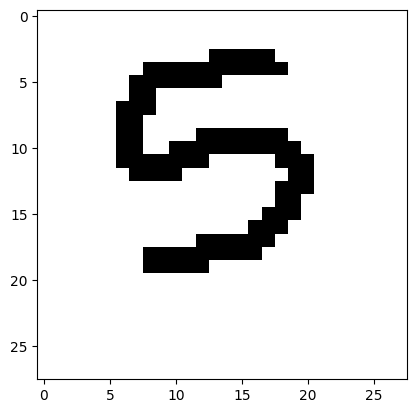

In [24]:
if os.path.isfile("number.png"):
    img = cv2.imread("number.png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.invert(np.array([img]))

    prediction = model.predict(img)
    print(f"This digit is probably a(n) {np.argmax(prediction)}!")

    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()